# Jogo da Forca

### Imports de bibliotecas

In [60]:
from Forca import JogoDeForca
import random
from collections import Counter
import matplotlib.pyplot as plt

In [61]:
def jogar(jogo):
    jogo.novo_jogo()
    palavra = jogo.palavra
    palavras = [p for p in jogo.content if len(p) == len(palavra)]
    print("A palavra é:", palavra)

    letras_tentadas = set()
    letras = Counter(letra for palavra in palavras for letra in palavra)

    while jogo.vidas > 0:
        if len(palavras) == 1 or (len(palavras) > 1 and jogo.vidas == 1):
            return jogo.tentar_palavra(palavras[0] if len(palavras) == 1 else random.choice(palavras))

        letra = max((letra for letra in letras if letra not in letras_tentadas), key=letras.get)
        print("Letra atual:", letra)
        tentativa_letra = jogo.tentar_letra(letra)
        print("Tentativa:", tentativa_letra)

        if tentativa_letra:
            novas_palavras = [palavra for palavra in palavras if all(palavra[idx] == letra for idx in tentativa_letra)]
        else:
            novas_palavras = [palavra for palavra in palavras if letra not in palavra]

        palavras = novas_palavras
        print("O tamanho da lista de palavras é:", len(palavras))
        letras_tentadas.add(letra)

        letras = Counter(letra for palavra in palavras for letra in palavra if letra not in letras_tentadas)

    return None

### Simulando 1000 jogos

In [62]:
vitorias, perdas = 0,0
jogo = JogoDeForca()

for i in range(1000):
    new_game = jogar(jogo)
    
    if new_game == True :
        vitorias += 1
    else:
        perdas += 1

A palavra é: amimaste
Letra atual: a
Tentativa: [0, 4]
O tamanho da lista de palavras é: 1248
Letra atual: r
Tentativa: []
O tamanho da lista de palavras é: 540
Letra atual: s
Tentativa: [5]
O tamanho da lista de palavras é: 124
Letra atual: e
Tentativa: [7]
O tamanho da lista de palavras é: 122
Letra atual: t
Tentativa: [6]
O tamanho da lista de palavras é: 61
Letra atual: l
Tentativa: []
O tamanho da lista de palavras é: 43
Letra atual: i
Tentativa: [2]
O tamanho da lista de palavras é: 13
Letra atual: m
Tentativa: [1, 3]
O tamanho da lista de palavras é: 1
Ganhou!
A palavra é: errasse
Letra atual: a
Tentativa: [3]
O tamanho da lista de palavras é: 4167
Letra atual: r
Tentativa: [1, 2]
O tamanho da lista de palavras é: 63
Letra atual: e
Tentativa: [0, 6]
O tamanho da lista de palavras é: 3
Letra atual: s
Tentativa: [4, 5]
O tamanho da lista de palavras é: 1
Ganhou!
A palavra é: flecharem
Letra atual: a
Tentativa: [5]
O tamanho da lista de palavras é: 10748
Letra atual: r
Tentativa: [

### Plotando proporção de Vitórias x Derrotas

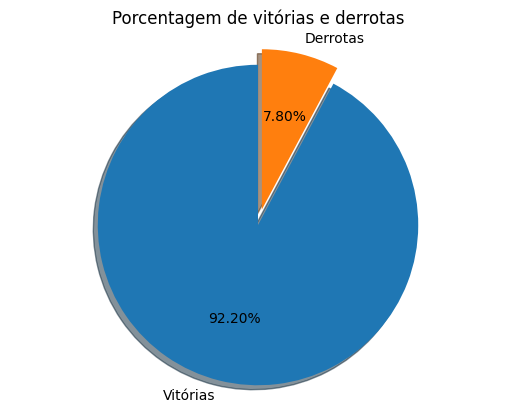

In [63]:
labels = 'Vitórias', 'Derrotas'
sizes = [vitorias, perdas]
explode = (0, 0.1) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.title("Porcentagem de vitórias e derrotas")
plt.show()